Fold change refers to the ratio of final value to initial value. In terms of gene expression, it can be defined as the ratio of the final quantification of mRNA to the initial content. The initial and final stages can be the time points or treatment and control conditions. It represents the change rather than an ambiguous absolute quantity. It has been suggested that while extracting DE genes from a dataset, fold changes can serve as more reproducible identifiers. This recipe will explain the use of fold changes for such purposes.
    
折线变化是指最终值与初始值之比。在基因表达方面，可以定义为mRNA最终定量与初始含量的比值。初始和最终阶段可以是时间点或治疗和控制条件。它表示变化，而不是一个模糊的绝对量。有人认为，当从数据集提取DE基因时，折叠变化可以作为更可重复的标识符。本教程将解释为实现此目的而使用的折叠更改。

1. Use the result from the limma analysis to get the fold changes. The table generated has a colunm for the fold change associated with the probes(an example table has been shown here). Refer to the working with the data of multiple classes recipe in this chapter to create the tested2 object. Take a look at the following object:

  利用limma分析的结果得到折线变化。生成的表具有与探测相关的fold更改的冒号(这里显示了一个示例表)。参考本章对多个类recipe数据的处理，创建tested2对象。看看下面这个物体:

In [1]:
library(leukemiasEset)
data(leukemiasEset)
pheno <- pData(leukemiasEset)
mydata <- leukemiasEset[, sampleNames(leukemiasEset)[c(1:3, 13:15, 25:27, 49:51)]]
design <- model.matrix(~0 + factor(pData(mydata)$LeukemiaType))
colnames(design) <- unique(as.character(pData(mydata)$LeukemiaType))
design

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Welcome to Bioconductor

    

,ALL,AML,CLL,NoL
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0
10,0,0,0,1


In [3]:
library(limma)
fit <- lmFit(mydata, design)
contrast.matrix <- makeContrasts(NoL- ALL, NoL- AML, NoL- CLL, levels = design)
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)
tested2 <- topTable(fit2,adjust="fdr",sort.by="B",number=Inf, coef=1)
DE2 <- tested2[tested2$adj.P.Val < 0.01,]


Attaching package: 'limma'

The following object is masked from 'package:BiocGenerics':

    plotMA



In [4]:
head(DE2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
ENSG00000152078,4.510507,4.856523,28.13988,4.463747e-11,9.004270e-07,14.01472
ENSG00000117519,-4.185175,4.791585,-22.73888,3.878292e-10,3.911645e-06,12.69738
ENSG00000145850,4.142236,4.507655,17.38636,5.759942e-09,2.925048e-05,10.72782
ENSG00000170180,5.681327,5.734169,17.37423,5.800214e-09,2.925048e-05,10.72231
ENSG00000087586,3.952183,5.720789,16.45393,9.977396e-09,3.111188e-05,10.28705
ENSG00000047597,5.362419,5.108415,16.32474,1.079114e-08,3.111188e-05,10.22315


2. Extract the relevant columns into a separate data frame for the top 10000 probes as follows:
 
 将相关列提取到top 10000探测的单独数据帧中，如下所示:


In [5]:
fit <- eBayes(fit)
myTable <- topTable(fit, number=10000)
logratio <- tested2$logFC

3. The fold change to log values and vice versa; the gtools library can be used as follows:
 
 折线变为对数值，反之亦然;gtools库的使用方法如下：

In [3]:
BiocManager::install("gtools")

Bioconductor version 3.8 (BiocManager 1.30.1), R 3.5.1 (2018-07-02)
Installing package(s) 'gtools'
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'gtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpYZ1387\downloaded_packages


Update old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocInstaller',
  'BiocManager', 'BiocParallel', 'biomaRt', 'Biostrings', 'broom', 'callr',
  'caret', 'checkpoint', 'class', 'cli', 'clipr', 'clusterProfiler',
  'codetools', 'colorspace', 'curl', 'data.table', 'dbplyr', 'ddalpha',
  'digest', 'dimRed', 'doParallel', 'DOSE', 'dplyr', 'enrichplot', 'evaluate',
  'fansi', 'fgsea', 'foreign', 'GenomeInfoDb', 'GenomicFeatures', 'ggplot2',
  'GOSemSim', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'igraph', 'ipred',
  'IRdisplay', 'IRkernel', 'jsonlite', 'kernlab', 'knitr', 'later', 'lattice',
  'lava', 'magic', 'markdown', 'MASS', 'Matrix', 'mgcv', 'mime', 'MKmisc',
  'ModelMetrics', 'modelr', 'muscle', 'openssl', 'pillar', 'pkgconfig', 'pls',
  'processx', 'purrr', 'qvalue', 'R6', 'Rcpp', 'readr', 'readxl', 'recipes',
  'repr', 'reprex', 'rlang', 'rmarkdown', 'robustbase', 'Rsamtools',
  'rstudioapi', 'RUnit', 'scales', 'sfsmisc', 'shiny', 'stringi', 'stringr',
  'survival', 'testthat'

In [6]:
library(gtools)

Warning message:
"package 'gtools' was built under R version 3.5.2"

In [8]:
LR <- foldchange2logratio(1, base=2)

In [9]:
FC <- logratio2foldchange(logratio, base=2)

4. Now, visualize the log fold change and p-value relations in a volcano plot as follows:
 
 将火山图中的记录折线变化和p值关系可视化如下图所示：

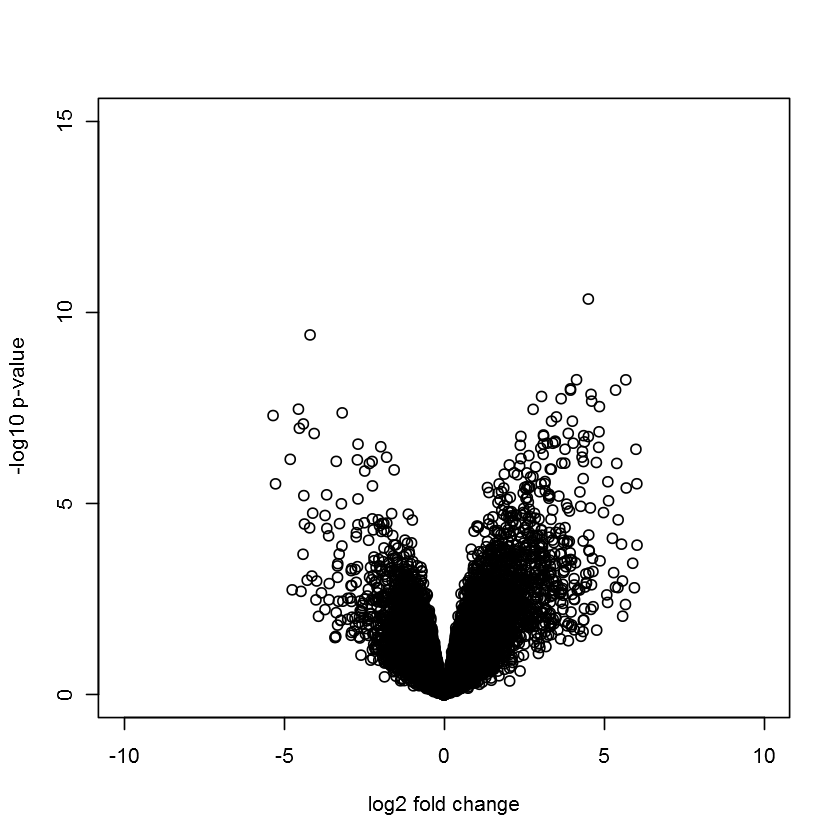

In [11]:
plot(tested2$logFC, -log10(tested2$P.Value),xlim=c(-10, 10), 
     ylim=c(0, 15), xlab="log2 fold change", ylab="-log10 p-value")

5. While selecting significant genes from the limma generated table, use the log fold change column as another criterion to select DE genes in combination with the p-value as follows:
 
 在从limma生成的表中选择重要基因时，使用log fold change列作为另一个标准，结合p值选择DE基因，如下所示：

In [12]:
myTable[tested2$P.Val < 0.05&tested2$logFC > 1.5,]

,ALL,AML,CLL,NoL,AveExpr,F,P.Value,adj.P.Val
ENSG00000177954,14.48894,14.39784,14.61716,14.27750,14.44536,26127.989,1.456821e-20,1.430395e-16
ENSG00000142534,13.93954,13.75007,13.95506,13.72552,13.84255,23133.285,2.726058e-20,1.430395e-16
ENSG00000198637,14.13433,14.11080,14.23767,14.03697,14.12994,22955.645,2.836398e-20,1.430395e-16
ENSG00000133112,13.78061,13.78450,13.77267,13.56294,13.72518,20350.440,5.272850e-20,2.014582e-16
ENSG00000198034,13.51314,13.80660,13.71761,13.38727,13.60616,19851.026,5.992212e-20,2.014582e-16
ENSG00000140988,14.10058,14.14974,14.22823,14.07113,14.13742,16599.698,1.504609e-19,4.185933e-16
ENSG00000233927,13.32112,13.23596,13.42129,13.17491,13.28832,16016.015,1.808992e-19,4.185933e-16
ENSG00000166710,12.99352,13.13625,13.27690,13.31242,13.17977,15917.092,1.867608e-19,4.185933e-16
ENSG00000109475,14.08755,13.98899,14.11584,13.77873,13.99278,14880.393,2.641368e-19,4.813734e-16
ENSG00000105193,13.29223,13.12494,13.47154,13.10956,13.24957,14837.774,2.680649e-19,4.813734e-16
